In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

bots=pd.read_csv("bots_data.csv",encoding='iso-8859-1')
nonbots=pd.read_csv("nonbots_data.csv",encoding='iso-8859-1')

In [2]:
bots_features=bots[bots.columns.tolist()[:-1]]
bots_labels=bots[bots.columns.tolist()[-1:]]
nonbots_features=nonbots[nonbots.columns.tolist()[:-1]]
nonbots_labels=nonbots[nonbots.columns.tolist()[-1:]]

In [3]:
##Concatenate the two dataframe from bots and nonbots csv 

X=pd.concat([bots_features,nonbots_features])
y=pd.concat([bots_labels,nonbots_labels])


In [4]:
## Examine the data shape

print 'There are %d accounts with %d features'%(X.shape[0],X.shape[1])
print '%d accounts are bots, %d are nonbots'%(np.sum(y['bot']==1),np.sum(y['bot']==0))

There are 2232 accounts with 19 features
1056 accounts are bots, 1176 are nonbots


In [5]:
from sklearn.cross_validation import train_test_split

c:\python27\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
##Split the whole data set in to 80% of training set and 20% of test set
X_train_raw,X_test_raw,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

##Preprossing: Convert all NaN value to 0
X_train_raw=X_train_raw.fillna(value=0)
y_train=y_train.fillna(value=0)
X_test_raw=X_test_raw.fillna(value=0)
y_test=y_test.fillna(value=0)

##Preprossing: Convert all value to numeric(like '123' to 123), for string values of characters, convert them to NaN
X_train_raw=X_train_raw.apply(pd.to_numeric,errors='coerce')
X_test_raw=X_test_raw.apply(pd.to_numeric,errors='coerce')
y_train=y_train.apply(pd.to_numeric,errors='coerce')
y_test=y_test.apply(pd.to_numeric,errors='coerce')

##Preprossing: Convert all NaN value to 1
##So to this point, for all featues with string values of characters, if it's blank, it is converted to 0, else it's 1
##So that we classify blank and strings into 0 and 1 value for those features but still keep numeric as numeric

X_train_raw=X_train_raw.fillna(value=1)
y_train=y_train.fillna(value=1)
X_test_raw=X_test_raw.fillna(value=1)
y_test=y_test.fillna(value=1)

print '%d accounts in validation/test set, %0.1f %% of total amount'%(X_test_raw.index.size,100*X_test_raw.index.size/float(X_test_raw.index.size+X_train_raw.index.size))


print '%d bots and %d nonbots in training set'%(np.sum(y_train['bot']==1),np.sum(y_train['bot']==0))
print '%d bots and %d nonbots in test set'%(np.sum(y_test['bot']==1),np.sum(y_test['bot']==0))

447 accounts in validation/test set, 20.0 % of total amount
831 bots and 954 nonbots in training set
225 bots and 222 nonbots in test set


In [7]:
from sklearn.naive_bayes import BernoulliNB
from sklearn import tree
from sklearn.cross_validation import cross_val_score
import math

In [8]:
## Below code only serve as making a copy of training and test sets 
##so that we won't modify the original data when we make change to the data we experiment with 

X_train=X_train_raw.fillna(value=1)
y_train=y_train.fillna(value=1)
X_test=X_test_raw.fillna(value=1)
y_test=y_test.fillna(value=1)


## Preprossing: Since id and id_str are irrelavant, setting them all to 1
for i in X_train.index:
    X_train.set_value(i,'id',1)
    X_train.set_value(i,'id_str',1)
for i in X_test.index:
    X_test.set_value(i,'id',1)
    X_test.set_value(i,'id_str',1)


## Preprossing: for the simplified model, we change non-Zero all to 1 and keep zero as 0.
def value_convert(df):
    columns=df.columns.tolist()
    counts_list= [columns[6],columns[7],columns[8],columns[10],columns[12]]  ##Only change features with multi-values

    for col in counts_list:
        alist=[]
        for i in df[col]:
            alist.append(i)
        for i in range(len(alist)):
            if alist[i]>1:
                alist[i]=1
            else: alist[i]=0
        selist=pd.Series(alist,index=df.index)
        df[col]=selist
    
value_convert(X_train)

value_convert(X_test)


X_train.head(20)


,id,id_str,screen_name,location,description,url,followers_count,friends_count,listedcount,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name
677,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1.0,1,True,1,1.0,1.0,False,False,0,1.0
438,1.0,1.0,1.0,1.0,1.0,0.0,0,1,0,1.0,1,False,1,1.0,1.0,True,False,0,1.0
299,1.0,1.0,1.0,0.0,1.0,0.0,0,1,0,1.0,1,False,1,1.0,1.0,True,False,0,1.0
440,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1.0,1,False,1,1.0,1.0,False,False,0,1.0
454,1.0,1.0,1.0,1.0,1.0,1.0,1,1,0,1.0,0,False,1,1.0,1.0,False,False,0,1.0
52,1.0,1.0,1.0,1.0,1.0,1.0,1,1,0,1.0,1,False,1,1.0,1.0,True,False,0,1.0
160,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1.0,1,True,1,1.0,1.0,False,False,0,1.0
699,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1.0,1,True,1,1.0,1.0,False,False,0,1.0
1068,1.0,1.0,1.0,1.0,0.0,1.0,1,1,0,1.0,1,False,1,1.0,1.0,False,False,0,1.0
1083,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1.0,1,False,1,1.0,1.0,False,False,0,1.0


In [9]:
## Create classifiers and train them
clfBN=BernoulliNB()
clfDT=tree.DecisionTreeClassifier()
clfBN=clfBN.fit(X_train,y_train)
clfDT=clfDT.fit(X_train,y_train)

c:\python27\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
##Use a class a scores to store scores of both classifiers, using cross_value score function to estimate the scores

class CrossValueScore:
    accuracy=0
    precision=0
    recall=0
    f1=0
    auc=0
    clf=None
    name=''
    def __init__(self,classifier,name_str):
        self.clf = classifier
        self.name=name_str
        
        
cross_score_BN=CrossValueScore(clfBN,'BernoulliNB')
cross_score_DT=CrossValueScore(clfDT,'Decision Tree')


scores=[cross_score_BN,cross_score_DT]

for i in scores:
    i.accuracy=cross_val_score(i.clf,X_train,y_train['bot'],scoring='accuracy',cv=5)
    i.precision=cross_val_score(i.clf,X_train,y_train['bot'],scoring='precision',cv=5)
    i.recall=cross_val_score(i.clf,X_train,y_train['bot'],scoring='recall',cv=5)
    i.f1=cross_val_score(i.clf,X_train,y_train['bot'],scoring='f1',cv=5)
    i.auc=cross_val_score(i.clf,X_train,y_train['bot'],scoring='roc_auc',cv=5)


In [11]:
## Print the scores of estimation
for i in scores:
    print '\n',i.name
    print 'Accuracy: ['+', '.join("%.2f"% j for j in i.accuracy)+']'+' Average = '+str(round(np.mean(i.accuracy),2))
    print 'Precision:['+', '.join("%.2f"% j for j in i.precision)+']'+' Average = '+str(round(np.mean(i.precision),2))
    print 'Recall:   ['+', '.join("%.2f"% j for j in i.recall)+']'+' Average = '+str(round(np.mean(i.recall),2))
    print 'f1:       ['+', '.join("%.2f"% j for j in i.f1)+']'+' Average = '+str(round(np.mean(i.f1),2))
    print 'auc:      ['+', '.join("%.2f"% j for j in i.auc)+']'+' Average = '+str(round(np.mean(i.auc),2))


BernoulliNB
Accuracy: [0.79, 0.80, 0.82, 0.80, 0.77] Average = 0.8
Precision:[0.75, 0.80, 0.80, 0.78, 0.74] Average = 0.77
Recall:   [0.83, 0.77, 0.82, 0.78, 0.78] Average = 0.79
f1:       [0.79, 0.78, 0.81, 0.78, 0.76] Average = 0.78
auc:      [0.88, 0.90, 0.91, 0.89, 0.87] Average = 0.89

Decision Tree
Accuracy: [0.82, 0.82, 0.85, 0.80, 0.79] Average = 0.82
Precision:[0.80, 0.88, 0.88, 0.81, 0.79] Average = 0.83
Recall:   [0.83, 0.72, 0.80, 0.75, 0.75] Average = 0.77
f1:       [0.82, 0.79, 0.84, 0.78, 0.77] Average = 0.8
auc:      [0.89, 0.89, 0.93, 0.89, 0.86] Average = 0.89


In [12]:
##Now we use the test set to evaluate the classifiers performance

##Use a class a scores to store scores of both classifiers, using metrics function to get the scores and arrays for later 
##drawing ROC curve and confusion matrices

from sklearn import metrics
class predictScore():
    accuracy=0
    precision=0
    recall=0
    f1=0
    auc=0
    clf=None
    roc_curve_fpr=0
    roc_curve_tpr=0
    roc_cruve_thresholds=0
    confusionMatrix=0
    name=''
    def __init__(self,classifier,name_str):
        self.clf = classifier
        self.name=name_str

predict_score_BN=predictScore(clfBN,'BernoulliNB')
predict_score_DT=predictScore(clfDT,'Decision Tree')
        
predicted_scores=[predict_score_BN,predict_score_DT]

for i in predicted_scores:
    predicted=i.clf.predict(X_test)
    i.accuracy=metrics.accuracy_score(np.array(y_test['bot']),predicted)
    i.precision=metrics.precision_score(np.array(y_test['bot']),predicted)
    i.recall=metrics.recall_score(np.array(y_test['bot']),predicted)
    i.f1=metrics.f1_score(np.array(y_test['bot']),predicted)
    i.auc=metrics.roc_auc_score(np.array(y_test['bot']),predicted)
    i.roc_curve_fpr,i.roc_curve_tpr,i.roc_cruve_thresholds=metrics.roc_curve(np.array(y_test['bot']),predicted)
    i.confusionMatrix=metrics.confusion_matrix(np.array(y_test['bot']),predicted)
    


In [16]:
## Print the scores
for i in predicted_scores:
    print '\n',i.name
    print ('Accuracy  = %.2f'%i.accuracy)
    print ('Precision = %.2f'%i.precision)
    print ('Recall    = %.2f'%i.recall)
    print ('F1        = %.2f'%i.f1)
    print ('Auc score = %.2f'%i.auc)


BernoulliNB
Accuracy  = 0.78
Precision = 0.78
Recall    = 0.77
F1        = 0.78
Auc score = 0.78

Decision Tree
Accuracy  = 0.82
Precision = 0.85
Recall    = 0.77
F1        = 0.81
Auc score = 0.82


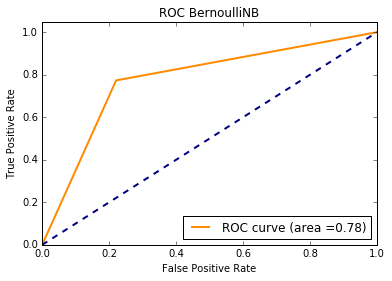

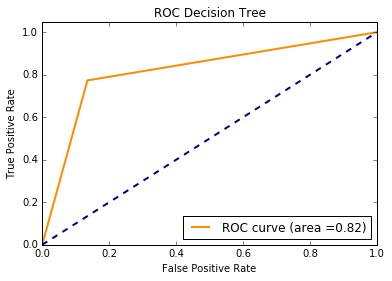

In [14]:
##Draw the ROC_curve
plt.figure()
lw = 2
for i in predicted_scores:

    plt.plot(i.roc_curve_fpr, i.roc_curve_tpr, color='darkorange',lw=lw, label='ROC curve (area =%.2f)'% i.auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC %s'%i.name)
    plt.legend(loc="lower right")
    plt.show()

Confusion matrix, without normalization
[[173  49]
 [ 51 174]]


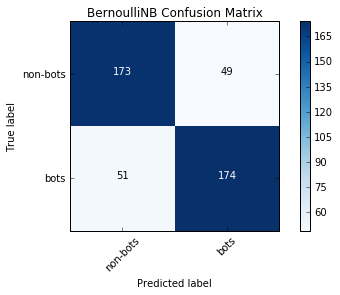

Confusion matrix, without normalization
[[192  30]
 [ 51 174]]


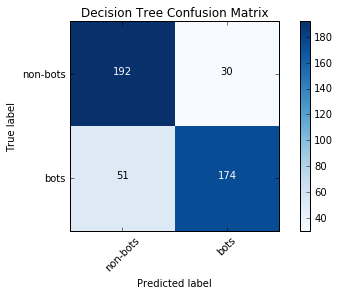

In [15]:
##Draw the confusion matrix 

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure()
for i in predicted_scores:
    plot_confusion_matrix(i.confusionMatrix, classes=['non-bots','bots'],
                      title=i.name+' Confusion Matrix')
    plt.show()
